In [1]:
%pip install transformers==4.44.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install huggingface_hub==0.24.5
%pip install nltk==3.8.1


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from transformers import pipeline

from nltk import sent_tokenize
import nltk
%pip install torch
import torch

c:\Users\phili\anaconda3\envs\gradiowin\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Note: you may need to restart the kernel to use updated packages.


In [4]:
#%pip install -U jupyter ipywidgets
%pip install numpy<2


Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [5]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
model_name= 'facebook/bart-large-mnli'
device = 0 if torch.cuda.is_available() else 'cpu'

In [7]:
def load_model(device):
    theme_classifier = pipeline("zero-shot-classification",
                      model_name= 'facebook/bart-large-mnli',
                      device=device)
    return theme_classifier

In [8]:
theme_classifier = load_model(device)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\phili\anaconda3\envs\gradiowin\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
candidate_labels = ['friendship','hope', 'sacrifice', 'battle','self development','betrayal','love','dialogue'] 


In [10]:
#%pip uninstall numpy
#%pip install "numpy<2"

import numpy as np
print(np.__version__)

1.26.4


In [11]:
theme_classifier(
    "I gave him a right hook then a left jab",
    candidate_labels,
    multi_label=True
)

{'sequence': 'I gave him a right hook then a left jab',
 'labels': ['battle',
  'self development',
  'hope',
  'sacrifice',
  'dialogue',
  'betrayal',
  'love',
  'friendship'],
 'scores': [0.9121252298355103,
  0.4749993681907654,
  0.08781809359788895,
  0.04499969258904457,
  0.020132586359977722,
  0.012040374800562859,
  0.0042922962456941605,
  0.0028171767480671406]}

#load dataset

In [12]:
from glob import glob

In [13]:
files = glob('../data/subtitles/*.ass')

In [14]:
files[:5]

['../data/subtitles\\Naruto Season 6 - 137.ass',
 '../data/subtitles\\Naruto Season 6 - 138.ass',
 '../data/subtitles\\Naruto Season 8 - 203.ass',
 '../data/subtitles\\Naruto Season 6 - 156.ass',
 '../data/subtitles\\Naruto Season 9 - 211.ass']

In [15]:
with open(files[0], 'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    lines = [ ",".join(line.split(',')[9:]) for line in lines ]

In [16]:
lines[:2]

['Hey boys, listen up!\n', 'Humans aren’t such a big deal\n']

In [17]:
lines = [ line.replace('\\N',' ') for line in lines]

In [18]:
lines[:4]

['Hey boys, listen up!\n',
 'Humans aren’t such a big deal\n',
 'Who needs tomorrow anyway,\n',
 'so don’t hide your fists\n']

In [19]:
" ".join(lines[:10])

'Hey boys, listen up!\n Humans aren’t such a big deal\n Who needs tomorrow anyway,\n so don’t hide your fists\n You’re not old enough\n to sell your dreams away to uncertainty\n Hey boys, you’re the only ones\n who can pull the trigger in your heart\n All the kids said\n We’re living in this senseless, ridiculous,\n'

In [20]:
int(files[0].split('-')[-1].split('.')[0].strip())

137

In [21]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [22]:
def load_subtitles_dataset(dataset_path):
    subtitles_paths = glob(dataset_path+'/*.ass')
    
    scripts=[]
    episode_num=[]
    
    for path in subtitles_paths:
        with open(path, 'r') as file:
            #read lines
            lines = file.readlines()
            lines = lines[27:]
            lines = [ ",".join(line.split(',')[9:]) for line in lines ]
            
        lines = [ line.replace('\\N',' ') for line in lines]
        script = " ".join(lines)
        
        episode = int(path.split('-')[-1].split('.')[0].strip())
        
        scripts.append(script)
        episode_num.append(episode)
    df = pd.DataFrame.from_dict({"episode":episode_num, "script":scripts})
    return df

In [23]:
dataset_path = "../data/subtitles"
df = load_subtitles_dataset(dataset_path)

In [24]:
df.head()

,episode,script
0,137,"Hey boys, listen up!\n Humans aren’t such a bi..."
1,138,"Hey boys, listen up!\n Humans aren’t such a bi..."
2,203,"Fly into the wavy and twisted sky, into your h..."
3,156,I want to try and gather the unrestrained wind...
4,211,"Fly into the wavy and twisted sky, into your h..."


In [25]:
#RUN MODEL

In [26]:
script = df.iloc[0]['script']

In [27]:
script

"Hey boys, listen up!\n Humans aren’t such a big deal\n Who needs tomorrow anyway,\n so don’t hide your fists\n You’re not old enough\n to sell your dreams away to uncertainty\n Hey boys, you’re the only ones\n who can pull the trigger in your heart\n All the kids said\n We’re living in this senseless, ridiculous,\n awesome world right at this moment,\n All the kids said\n Don’t forget every truth or lie\n All the kids said\n We’re way too young to die\n In this empty town lined with empty faces\n All the kids took off\n into this windless night\n Because they want to change something\n A Town of Outlaws!                           The Shadow of the Fuma Clan\n It seems that the most bustling traveler’s town in the Land of Rice Paddies\n is at the bottom of these mountains.\n You’re going to weird places again\n in the name of investigation, aren’t you, Pervy Sage?!\n Please stop it already!\n We had a rough time shaking off the bodyguards from the rip-off bar.\n I understand your point

In [28]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

['Hey boys, listen up!',
 'Humans aren’t such a big deal\n Who needs tomorrow anyway,\n so don’t hide your fists\n You’re not old enough\n to sell your dreams away to uncertainty\n Hey boys, you’re the only ones\n who can pull the trigger in your heart\n All the kids said\n We’re living in this senseless, ridiculous,\n awesome world right at this moment,\n All the kids said\n Don’t forget every truth or lie\n All the kids said\n We’re way too young to die\n In this empty town lined with empty faces\n All the kids took off\n into this windless night\n Because they want to change something\n A Town of Outlaws!',
 'The Shadow of the Fuma Clan\n It seems that the most bustling traveler’s town in the Land of Rice Paddies\n is at the bottom of these mountains.']

In [29]:
#batch sentences
script_batches = []
sentence_batch_size=20
for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)

In [30]:
script_batches

["Hey boys, listen up! Humans aren’t such a big deal\n Who needs tomorrow anyway,\n so don’t hide your fists\n You’re not old enough\n to sell your dreams away to uncertainty\n Hey boys, you’re the only ones\n who can pull the trigger in your heart\n All the kids said\n We’re living in this senseless, ridiculous,\n awesome world right at this moment,\n All the kids said\n Don’t forget every truth or lie\n All the kids said\n We’re way too young to die\n In this empty town lined with empty faces\n All the kids took off\n into this windless night\n Because they want to change something\n A Town of Outlaws! The Shadow of the Fuma Clan\n It seems that the most bustling traveler’s town in the Land of Rice Paddies\n is at the bottom of these mountains. You’re going to weird places again\n in the name of investigation, aren’t you, Pervy Sage?! Please stop it already! We had a rough time shaking off the bodyguards from the rip-off bar. I understand your point,\n but there’s no other way to fin

In [31]:
theme_output = theme_classifier(
    script_batches[:2],
    candidate_labels,
    multi_label=True
)

In [32]:
theme_output

[{'sequence': "Hey boys, listen up! Humans aren’t such a big deal\n Who needs tomorrow anyway,\n so don’t hide your fists\n You’re not old enough\n to sell your dreams away to uncertainty\n Hey boys, you’re the only ones\n who can pull the trigger in your heart\n All the kids said\n We’re living in this senseless, ridiculous,\n awesome world right at this moment,\n All the kids said\n Don’t forget every truth or lie\n All the kids said\n We’re way too young to die\n In this empty town lined with empty faces\n All the kids took off\n into this windless night\n Because they want to change something\n A Town of Outlaws! The Shadow of the Fuma Clan\n It seems that the most bustling traveler’s town in the Land of Rice Paddies\n is at the bottom of these mountains. You’re going to weird places again\n in the name of investigation, aren’t you, Pervy Sage?! Please stop it already! We had a rough time shaking off the bodyguards from the rip-off bar. I understand your point,\n but there’s no oth

In [33]:
#wrangle output
themes={}
for output in theme_output:
    for label,score in zip(output['labels'],output['scores']):
        if label not in themes:
            themes[label]=[]
        themes[label].append(score)

In [34]:
themes

{'dialogue': [0.9408128261566162, 0.9926508665084839],
 'sacrifice': [0.8488307595252991, 0.9906684756278992],
 'self development': [0.789034366607666, 0.9584247469902039],
 'betrayal': [0.7351801991462708, 0.7766664624214172],
 'battle': [0.7231693863868713, 0.917252779006958],
 'hope': [0.4617510139942169, 0.8220981955528259],
 'friendship': [0.3505013585090637, 0.8262737989425659],
 'love': [0.13266074657440186, 0.4894184172153473]}

In [35]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)
    script_batches = []
    sentence_batch_size=20
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)
        
    # Run model
    theme_output = theme_classifier(script_batches[:2], 
                       candidate_labels,multi_label=True)
    
    # Wrangle Output
    themes={}
    for output in  theme_output:
        for label, score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label]=[]
            themes[label].append(score)
    
    themes =  {key:np.mean(np.array(value)) for key,value in themes.items()}
   
    return themes

In [36]:
df = df.head(2)


In [37]:
df

,episode,script
0,137,"Hey boys, listen up!\n Humans aren’t such a bi..."
1,138,"Hey boys, listen up!\n Humans aren’t such a bi..."


In [40]:
output_themes = df['script'].apply(get_themes_inference)


In [41]:
output_themes


0    {'dialogue': 0.96673184633255, 'sacrifice': 0....
1    {'betrayal': 0.6480903327465057, 'dialogue': 0...
Name: script, dtype: object

In [42]:
theme_df = pd.DataFrame(output_themes.tolist())


In [43]:
theme_df


,dialogue,sacrifice,self development,betrayal,battle,hope,friendship,love
0,0.966732,0.919750,0.873730,0.755923,0.820211,0.641925,0.588388,0.311040
1,0.973224,0.636622,0.757359,0.648090,0.711326,0.501585,0.348399,0.192662


In [44]:
df

,episode,script
0,137,"Hey boys, listen up!\n Humans aren’t such a bi..."
1,138,"Hey boys, listen up!\n Humans aren’t such a bi..."


In [45]:
df[theme_df.columns] = theme_df
df

,episode,script,dialogue,sacrifice,self development,betrayal,battle,hope,friendship,love
0,137,"Hey boys, listen up!\n Humans aren’t such a bi...",0.966732,0.919750,0.873730,0.755923,0.820211,0.641925,0.588388,0.311040
1,138,"Hey boys, listen up!\n Humans aren’t such a bi...",0.973224,0.636622,0.757359,0.648090,0.711326,0.501585,0.348399,0.192662


In [38]:
# Visualize output

In [46]:
df = df.drop('dialogue',axis=1)

In [50]:
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()

theme_output.columns = ['theme','score']
theme_output



,theme,score
0,sacrifice,1.556371
1,self development,1.631089
2,betrayal,1.404014
3,battle,1.531537
4,hope,1.143509
5,friendship,0.936786
6,love,0.503701


In [52]:
%pip install matplotlib
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 5.0 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 4.7 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 4.8 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 4.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 5.0 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 4.8 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 4.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB

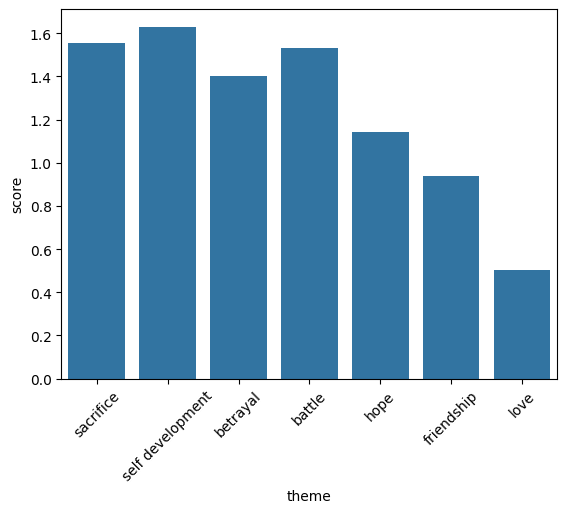

In [54]:
sns.barplot(data = theme_output, x='theme',y='score')
plt.xticks(rotation=45)
plt.show()
